# **Preprocessing the 'Dog vs Cat - FastAI' Dataset: Converting Images to Features for CNN Classification**






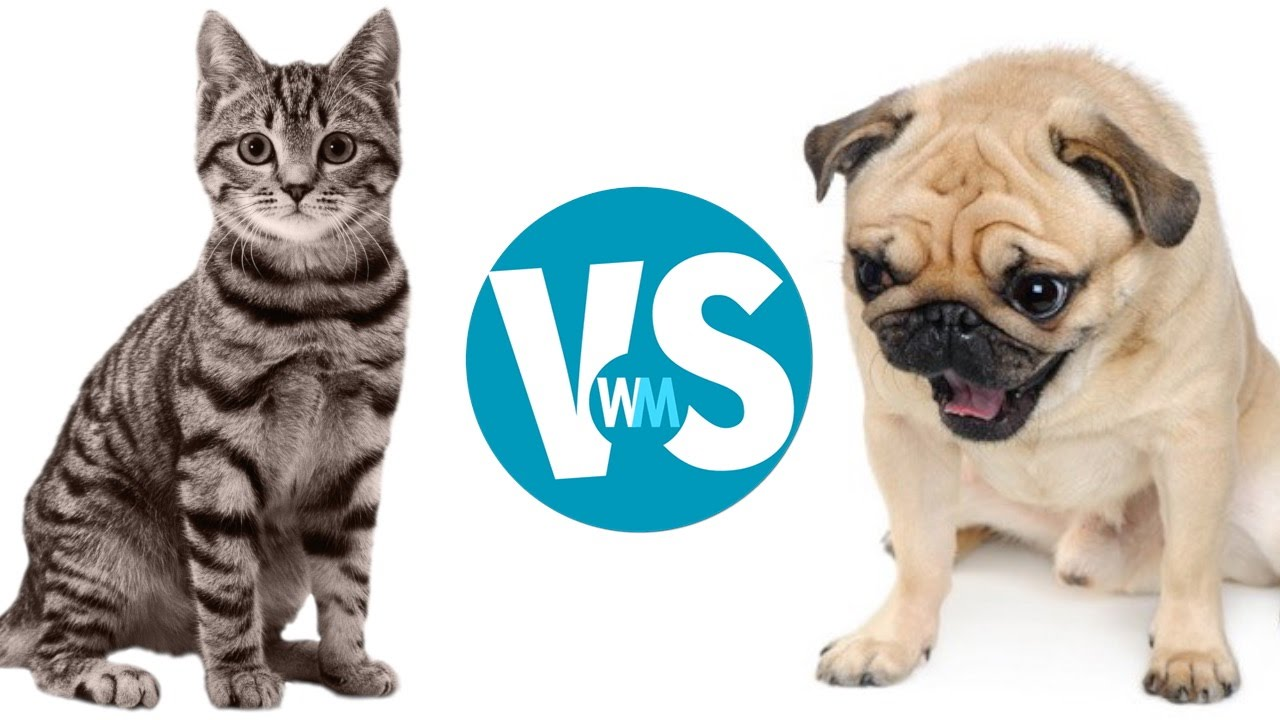

The first part of the Jupyter notebook focuses on preprocessing the data from the Kaggle dataset "Dog vs Cat - FastAI". The main objective is to load the image files, extract their features, and save them as pickle files along with their corresponding labels. Additionally, the notebook will convert these features and labels into arrays that can be used in a convolutional neural network (CNN) for classification. The preprocessing steps will ensure that the data is in a suitable format for training a deep learning model.

In [2]:
# Libraries
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import pickle
import cv2

## **Data Preprocessing**

Before training a deep learning model, it is necessary to preprocess the dataset to ensure that the input data is in a suitable format for the model. One of the essential preprocessing steps for image datasets is resizing the images to a uniform size. This step is necessary to ensure that all images are processed equally and can be fed into the deep learning model for classification.

The code block provided is an example of how to resize images using OpenCV library's 'cv2.resize' method. It iterates through each image in the dataset, resizes it to a square shape with 100 pixels on each side, and displays the resized image using 'plt.imshow'. Additionally, it assigns a label to each image based on its category and stores the resized image as a NumPy array.

This code block is a crucial step in preparing image data for training a convolutional neural network (CNN) model, as it ensures that all images are of the same size, which is necessary for feeding the data into the CNN model.

In [3]:
# Define the path to the data directory
DIRECTORY = r'C:\Users\Edwar\Documents\DATA_SCIENCE_PROJECTS\Cat-vs.-Dog-Breed-Prediction\dog-vs-cat-fastai\dogscats\dogscats\train'
CATEGORIES = ['cats', 'dogs']

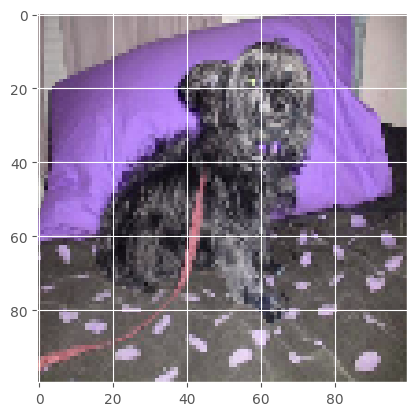

In [4]:
# Loop through the images and resize them
IMG_SIZE = 100
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img_file in os.listdir(folder):
        img_path = os.path.join(folder, img_file)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        plt.imshow(img_arr)
        break


In [5]:
# Converting the images to arrays
IMG_SIZE = 100
data = []
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img_file in os.listdir(folder):
        img_path = os.path.join(folder, img_file)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])

In [6]:
# print(data)
len(data)

23000

Randomizing the data is an essential step in preparing the dataset for deep learning models. It ensures that the order of the input data does not bias the training process, which can lead to overfitting. The 'random.shuffle' method is used to shuffle the data in a random order, ensuring that each element's position is unpredictable. This method takes a list or array as input and randomly shuffles its elements. In this code block, the 'data' list is shuffled using this method, ensuring that the input features and their corresponding labels are randomized.

In [7]:
# randomising the data
random.shuffle(data)

## **Converting the data into numpy arrays**

Before feeding the data into a deep learning model, it is necessary to split it into two separate arrays: input features (X) and corresponding labels (y). This step is crucial for supervised learning tasks, where the model needs to learn from the input data and their respective labels.

The code block provided splits the data into X and y arrays. It uses a for loop to iterate through each element in the 'data' list, which contains tuples of input features and labels. For each tuple, the input features are appended to the 'X' list, and the corresponding label is appended to the 'y' list.

After all the elements have been processed, the code converts the 'X' and 'y' lists into NumPy arrays using the 'np.array' method, which is the format required for training deep learning models.

In [8]:
data[0] # 0 is a cat, 1 is a dog

[array([[[ 95, 139, 138],
         [ 99, 143, 142],
         [100, 144, 143],
         ...,
         [ 70, 100, 101],
         [ 79, 109, 110],
         [ 87, 117, 118]],
 
        [[ 93, 137, 136],
         [ 98, 142, 141],
         [101, 145, 144],
         ...,
         [ 69,  99, 100],
         [ 86, 116, 117],
         [ 86, 116, 117]],
 
        [[ 97, 141, 140],
         [102, 145, 145],
         [103, 147, 146],
         ...,
         [ 74, 104, 105],
         [ 91, 121, 122],
         [ 86, 116, 117]],
 
        ...,
 
        [[ 93, 139, 144],
         [ 90, 134, 140],
         [ 83, 130, 135],
         ...,
         [ 82, 111, 112],
         [ 88, 118, 118],
         [ 69,  98,  99]],
 
        [[ 99, 147, 149],
         [101, 140, 147],
         [ 97, 139, 147],
         ...,
         [ 79, 109, 110],
         [ 86, 118, 117],
         [ 82, 110, 109]],
 
        [[101, 149, 151],
         [104, 143, 150],
         [101, 143, 152],
         ...,
         [ 75, 105, 106],
  

In [9]:
# Splitting the data into X and y
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [10]:
# Getting the arrays ready for the model
X = np.array(X)
y = np.array(y)

Finally, we can save the preprocessed data into pickle files as follows:

In [11]:
# Save the data into a pickle file
pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))